<a href="https://colab.research.google.com/github/sowjanyahebbar/Devops1/blob/main/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/winequalityN.csv')
df.head()

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]

In [ ]:


# statistical info
df.describe()



fixed acidity  volatile acidity  ...      alcohol      quality
count    6487.000000       6489.000000  ...  6497.000000  6497.000000
mean        7.216579          0.339691  ...    10.491801     5.818378
std         1.296750          0.164649  ...     1.192712     0.873255
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.400000          0.230000  ...     9.500000     5.000000
50%         7.000000          0.290000  ...    10.300000     6.000000
75%         7.700000          0.400000  ...    11.300000     6.000000
max        15.900000          1.580000  ...    14.900000     9.000000

[8 rows x 12 columns]

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
# check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

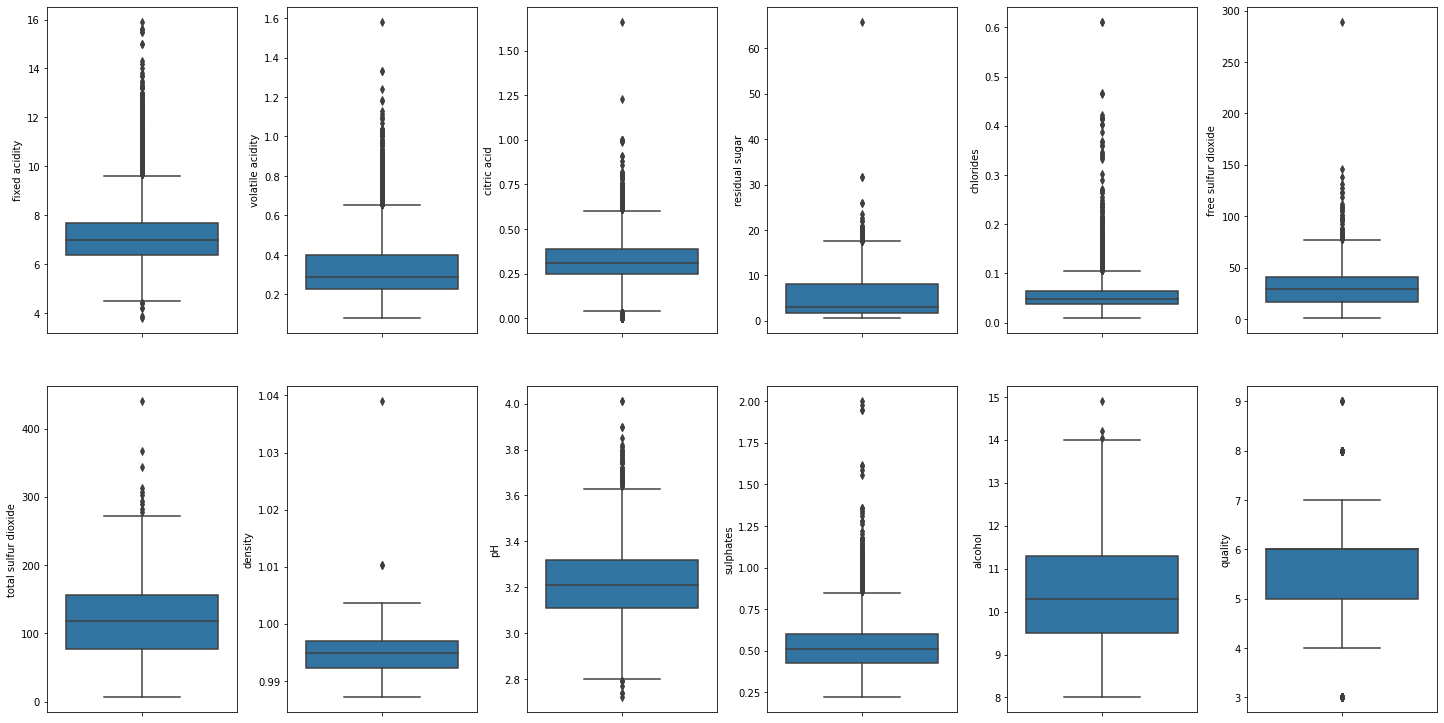

In [ ]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

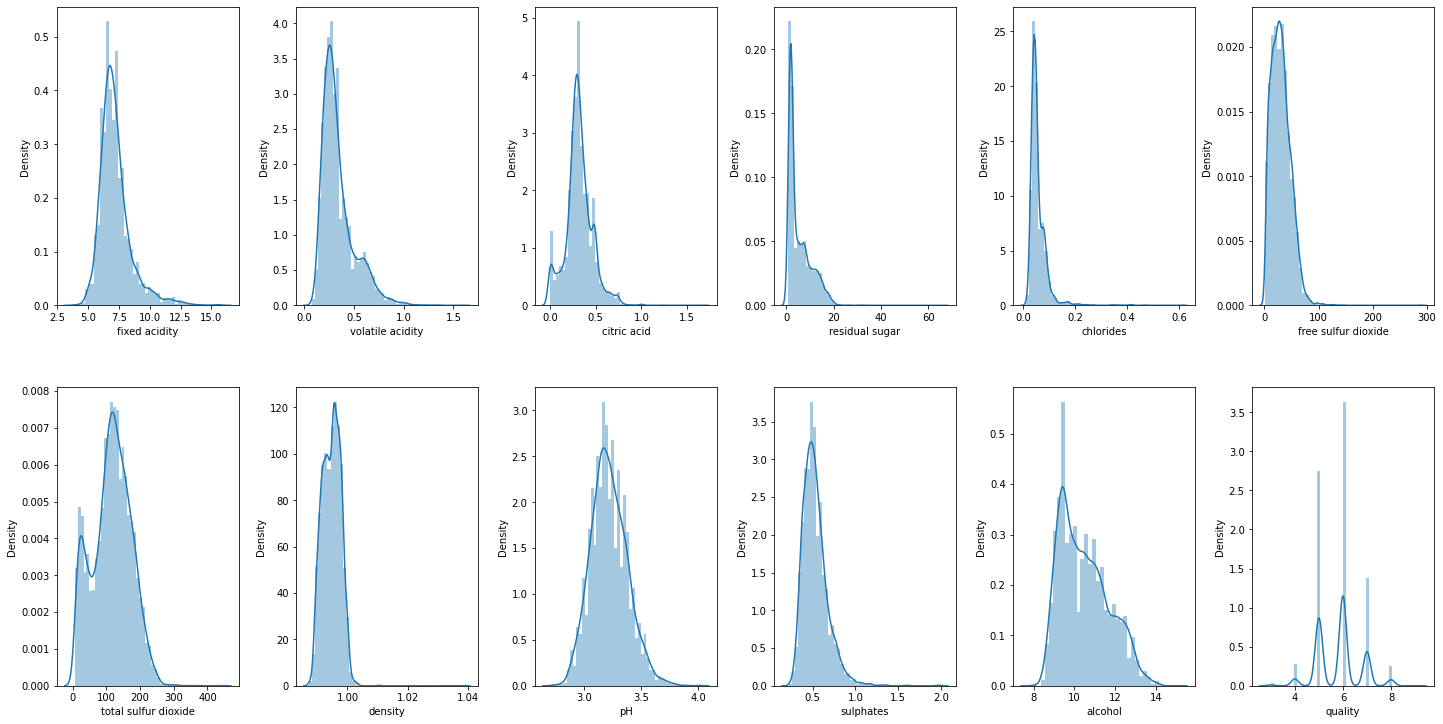

In [ ]:


# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)



In [ ]:
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

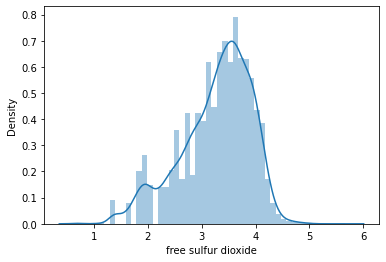

In [ ]:
sns.distplot(df['free sulfur dioxide'])

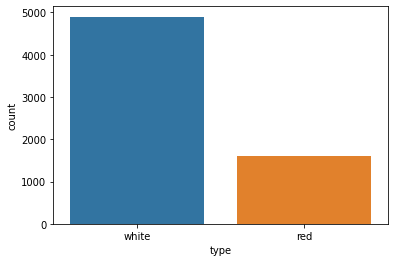

In [ ]:
sns.countplot(df['type'])

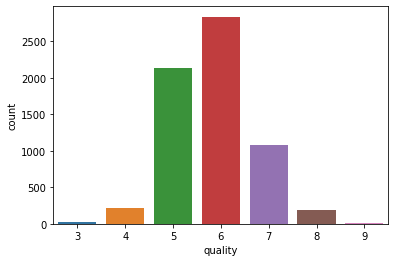

In [ ]:
sns.countplot(df['quality'])

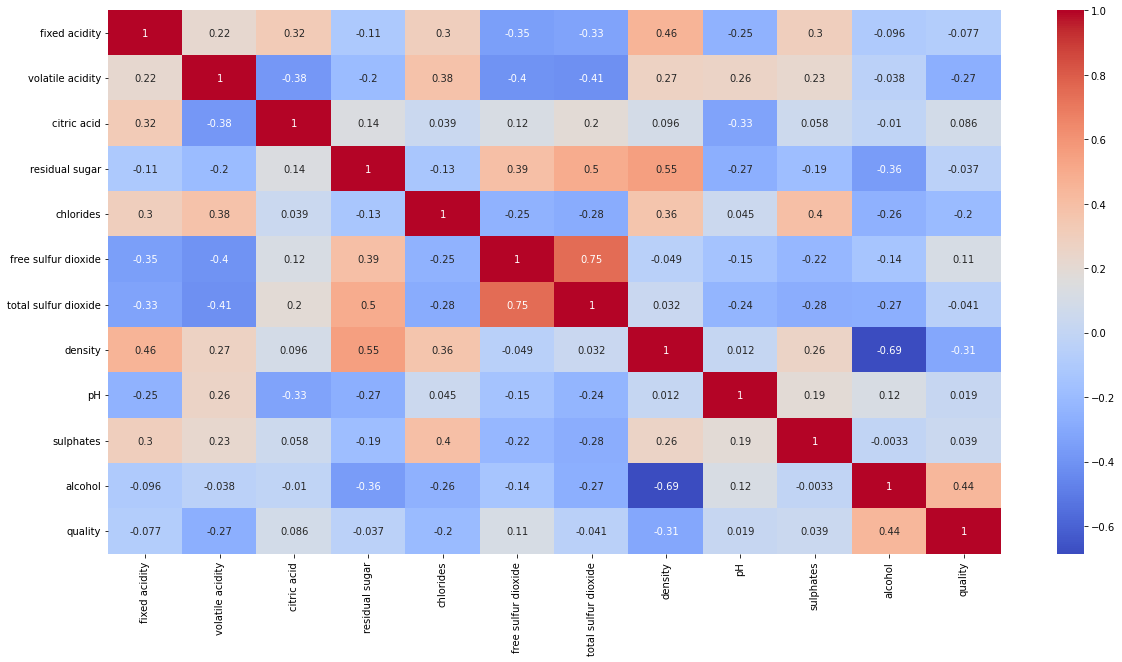

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
X = df.drop(columns=['type', 'quality'])
y = df['quality']

In [ ]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:


from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)



In [ ]:
# classify function
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

    # f1 score
    y_pred1 = model.predict(x_test)
    print(classification_report(y_test, y_pred1))

    

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)



Accuracy: 36.14749143663107
CV Score: 31.925960696155443
              precision    recall  f1-score   support

           3       0.43      0.34      0.38       724
           4       0.32      0.46      0.38       698
           5       0.25      0.31      0.28       707
           6       0.25      0.14      0.18       726
           7       0.27      0.13      0.17       706
           8       0.43      0.42      0.43       736
           9       0.48      0.77      0.59       666

    accuracy                           0.36      4963
   macro avg       0.35      0.37      0.34      4963
weighted avg       0.35      0.36      0.34      4963



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 81.05984283699375
CV Score: 74.7632717554918
              precision    recall  f1-score   support

           3       0.95      0.96      0.95       724
           4       0.85      0.85      0.85       698
           5       0.67      0.66      0.67       707
           6       0.61      0.61      0.61       726
           7       0.75      0.74      0.75       706
           8       0.85      0.87      0.86       736
           9       0.99      1.00      1.00       666

    accuracy                           0.81      4963
   macro avg       0.81      0.81      0.81      4963
weighted avg       0.81      0.81      0.81      4963



In [ ]:


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)


Accuracy: 88.19262542816844
CV Score: 82.4652991112518
              precision    recall  f1-score   support

           3       0.98      0.99      0.99       724
           4       0.91      0.97      0.94       698
           5       0.79      0.75      0.77       707
           6       0.73      0.63      0.68       726
           7       0.80      0.88      0.84       706
           8       0.94      0.97      0.96       736
           9       1.00      1.00      1.00       666

    accuracy                           0.88      4963
   macro avg       0.88      0.88      0.88      4963
weighted avg       0.88      0.88      0.88      4963



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 88.79709852911546
CV Score: 83.21587681978983
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       724
           4       0.92      0.98      0.95       698
           5       0.78      0.76      0.77       707
           6       0.75      0.62      0.68       726
           7       0.80      0.90      0.85       706
           8       0.95      0.98      0.97       736
           9       1.00      1.00      1.00       666

    accuracy                           0.89      4963
   macro avg       0.89      0.89      0.89      4963
weighted avg       0.88      0.89      0.88      4963



In [ ]:


import xgboost as xgb
model = xgb.XGBClassifier()
classify(model, X, y)



Accuracy: 66.85472496473906
CV Score: 64.10445883790985
              precision    recall  f1-score   support

           3       0.83      0.86      0.85       724
           4       0.65      0.71      0.68       698
           5       0.53      0.54      0.53       707
           6       0.48      0.29      0.36       726
           7       0.50      0.53      0.52       706
           8       0.66      0.79      0.72       736
           9       0.96      1.00      0.98       666

    accuracy                           0.67      4963
   macro avg       0.66      0.67      0.66      4963
weighted avg       0.66      0.67      0.66      4963



In [ ]:
import lightgbm 
model = lightgbm.LGBMClassifier()
classify(model, X, y)

Accuracy: 83.29639331049769
CV Score: 78.22413505471341
              precision    recall  f1-score   support

           3       0.98      0.99      0.98       724
           4       0.87      0.91      0.89       698
           5       0.69      0.66      0.68       707
           6       0.63      0.55      0.58       726
           7       0.74      0.78      0.76       706
           8       0.90      0.95      0.92       736
           9       1.00      1.00      1.00       666

    accuracy                           0.83      4963
   macro avg       0.83      0.83      0.83      4963
weighted avg       0.83      0.83      0.83      4963

